![Redfin](Redfin.png)

# Predicting Housing Market Trends Using Data Science

**Potential Insights:** This dataset provides insights into housing market trends across different regions. I chose this dataset because housing market data reflects economic patterns, consumer behavior, and financial stability. By analyzing price fluctuations, sales trends, and inventory changes, I aim to identify key indicators that predict market shifts. The structured approach from Kaggle competitions will be applied to extract meaningful patterns, focusing on how market dynamics evolve over time.     

Additionally, the dataset's inclusion of multiple region types allows for comparisons between national trends and city-specific behaviors, providing an opportunity to explore how different real estate markets respond to economic factors. By leveraging machine learning techniques learned from the competitions, I will analyze potential leading indicators of price changes and market cycles.

### Project Scope
**Objectives:** Identify key trends and patterns in the housing market, predict market fluctuations, and provide actionable insights into real estate trend      

**Deliverables:** Charts, graphs, statistical reports, predictive models, and a final research paper detailing insights and methodologies.      

Milestones:      
- Data collection and cleaning (Week 1)    
- Exploratory Data Analysis (Weeks 2-3)    
- Model selection and training (Weeks 4-6)     
- Model validation and optimization (Weeks 7-8)    
- Final report and presentation (Weeks 9-10)     

Tasks:       
- Data acquisition and preprocessing      
- Exploratory data analysis (EDA)      
- Feature engineering and selection      
- Model training and validation      
- Performance evaluation and optimization     
- Presentation of findings      

**Resources:** Python, Pandas, NumPy, Scikit-Learn, Matplotlib, Seaborn, Jupyter Notebook      

### Research Plan
**Techniques and Methods:** Time-series analysis, regression models, machine learning techniques, and cross-validation methods.
Application: Apply time-series forecasting models to predict housing price trends, use feature engineering techniques to identify key drivers of price fluctuations, and validate results using robust evaluation metrics.      

**Hypothesis**
- **Hypothesis Statement:** Housing market trends can be predicted by analyzing historical price fluctuations, inventory changes, and sales patterns. By applying machine learning techniques, we can identify early indicators of market shifts, allowing for better-informed real estate investment decisions.

# Imports

In [1]:
# my imports
import wrangle as w
import explore as e
#import modeling as m

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

imports loaded successfully, awaiting commands...


# Wrangle
---
- Raw Data acquired from Redfin
- 1099 rows x 20 columns before cleaning
- Data acquired from Google BigQuery after cleaning
- 1099 rows x 20 columns after cleaning

## Prepare
---
- Clean the data
    - Rename columns
    - Remove nulls
    - Remove extra characters
    - Remove extra spaces
    - Fixed data type

In [2]:
redfin_df = w.check_file_exists_gbq("data.csv", "service-account-key.json", 
                                    "iu-thesis-project.Redfin_Monthly_Housing_Market_Data.Redfin")

✅ CSV file 'data.csv' found locally. Checking data quality...
Detected encoding: ascii
✅ Data appears to be clean.
✅ Data is already clean. No need to clean or upload.


### A Brief Look At The Data
---

In [3]:
redfin_df.head()

region       month_of_period_end  median_sale_price  \
0   National 2022-07-01 00:00:00+00:00             413000   
1   National 2022-08-01 00:00:00+00:00             407000   
2   National 2022-06-01 00:00:00+00:00             429000   
3   National 2021-08-01 00:00:00+00:00             381000   
4   National 2021-09-01 00:00:00+00:00             377000   

   median_sale_price_mom  median_sale_price_yoy  homes_sold  homes_sold_mom  \
0                   -3.6                    7.4      530476           -14.4   
1                   -1.5                    6.9      559150             5.4   
2                   -0.7                   10.8      619857             4.1   
3                   -1.1                   16.2      672612            -1.0   
4                   -1.0                   13.9      638337            -5.1   

   homes_sold_yoy  new_listings  new_listings_mom  new_listings_yoy  \
0           -21.9        705215             -14.3             -11.9   
1           -16.9        622537             -11.7             -13.7   
2           -15.0        822855               6.4               1.0   
3             0.1        721768              -9.8               0.0   
4            -4.7        675008              -6.5              -4.5   

   inventory  inventory_mom  inventory_yoy  days_on_market  \
0    1240506           10.2           27.1              21   
1    1225537           -1.2           26.7              27   
2    1125321           20.7           28.1              18   
3     967307           -0.9          -18.2              17   
4     969546            0.2          -16.1              19   

   days_on_market_mom  days_on_market_yoy  average_sale_to_list  \
0                   3                   6                 101.0   
1                   5                  10                  99.9   
2                   1                   3                 102.2   
3                   2                 -15                 101.6   
4                   2                 -11                 101.0   

   average_sale_to_list_mom  average_sale_to_list_yoy  
0                      -1.2                      -1.2  
1                      -1.1                      -1.7  
2                      -0.8                      -0.3  
3                      -0.6                       2.4  
4                      -0.6                       1.7

### A Summary Of The Data
---

In [4]:
e.data_summary(redfin_df)

data shape: (1099, 20)


data type  #missing  %missing  #unique  \
region                                 object         0       0.0        7   
month_of_period_end       datetime64[ns, UTC]         0       0.0      157   
median_sale_price                       int64         0       0.0      416   
median_sale_price_mom                 float64         0       0.0      186   
median_sale_price_yoy                 float64         0       0.0      251   
homes_sold                              int64         0       0.0     1036   
homes_sold_mom                        float64         0       0.0      556   
homes_sold_yoy                        float64         0       0.0      490   
new_listings                            int64         0       0.0     1062   
new_listings_mom                      float64         0       0.0      634   
new_listings_yoy                      float64         0       0.0      462   
inventory                               int64         0       0.0     1084   
inventory_mom                         float64         0       0.0      367   
inventory_yoy                         float64         0       0.0      558   
days_on_market                          int64         0       0.0      100   
days_on_market_mom                      int64         0       0.0       45   
days_on_market_yoy                      int64         0       0.0       86   
average_sale_to_list                  float64         0       0.0      130   
average_sale_to_list_mom              float64         0       0.0       43   
average_sale_to_list_yoy              float64         0       0.0       99   

                           count                                 mean  \
region                      1099                                  NaN   
month_of_period_end         1099  2018-07-01 19:52:21.401273856+00:00   
median_sale_price         1099.0                        407515.013649   
median_sale_price_mom     1099.0                             0.610464   
median_sale_price_yoy     1099.0                             6.849045   
homes_sold                1099.0                         73960.789809   
homes_sold_mom            1099.0                              1.37152   
homes_sold_yoy            1099.0                              1.94222   
new_listings              1099.0                         89187.496815   
new_listings_mom          1099.0                             3.776797   
new_listings_yoy          1099.0                              0.10919   
inventory                 1099.0                        224060.347589   
inventory_mom             1099.0                            -0.101001   
inventory_yoy             1099.0                            -4.468062   
days_on_market            1099.0                            38.658781   
days_on_market_mom        1099.0                            -0.213831   
days_on_market_yoy        1099.0                            -3.524113   
average_sale_to_list      1099.0                            99.071338   
average_sale_to_list_mom  1099.0                             0.020291   
average_sale_to_list_yoy  1099.0                             0.301911   

                                    std                        min  \
region                              NaN                        NaN   
month_of_period_end                 NaN  2012-01-01 00:00:00+00:00   
median_sale_price          189404.64317                   134000.0   
median_sale_price_mom          3.657105                      -12.8   
median_sale_price_yoy           5.72749                      -10.7   
homes_sold                174049.251215                      974.0   
homes_sold_mom                18.047561                      -40.6   
homes_sold_yoy                17.349035                      -56.9   
new_listings              210707.155307                     1010.0   
new_listings_mom              29.206833                      -59.5   
new_listings_yoy              17.261469                      -70.1   
inventory              

In [5]:
redfin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   region                    1099 non-null   object             
 1   month_of_period_end       1099 non-null   datetime64[ns, UTC]
 2   median_sale_price         1099 non-null   int64              
 3   median_sale_price_mom     1099 non-null   float64            
 4   median_sale_price_yoy     1099 non-null   float64            
 5   homes_sold                1099 non-null   int64              
 6   homes_sold_mom            1099 non-null   float64            
 7   homes_sold_yoy            1099 non-null   float64            
 8   new_listings              1099 non-null   int64              
 9   new_listings_mom          1099 non-null   float64            
 10  new_listings_yoy          1099 non-null   float64            
 11  inventory        

---
# Exploration

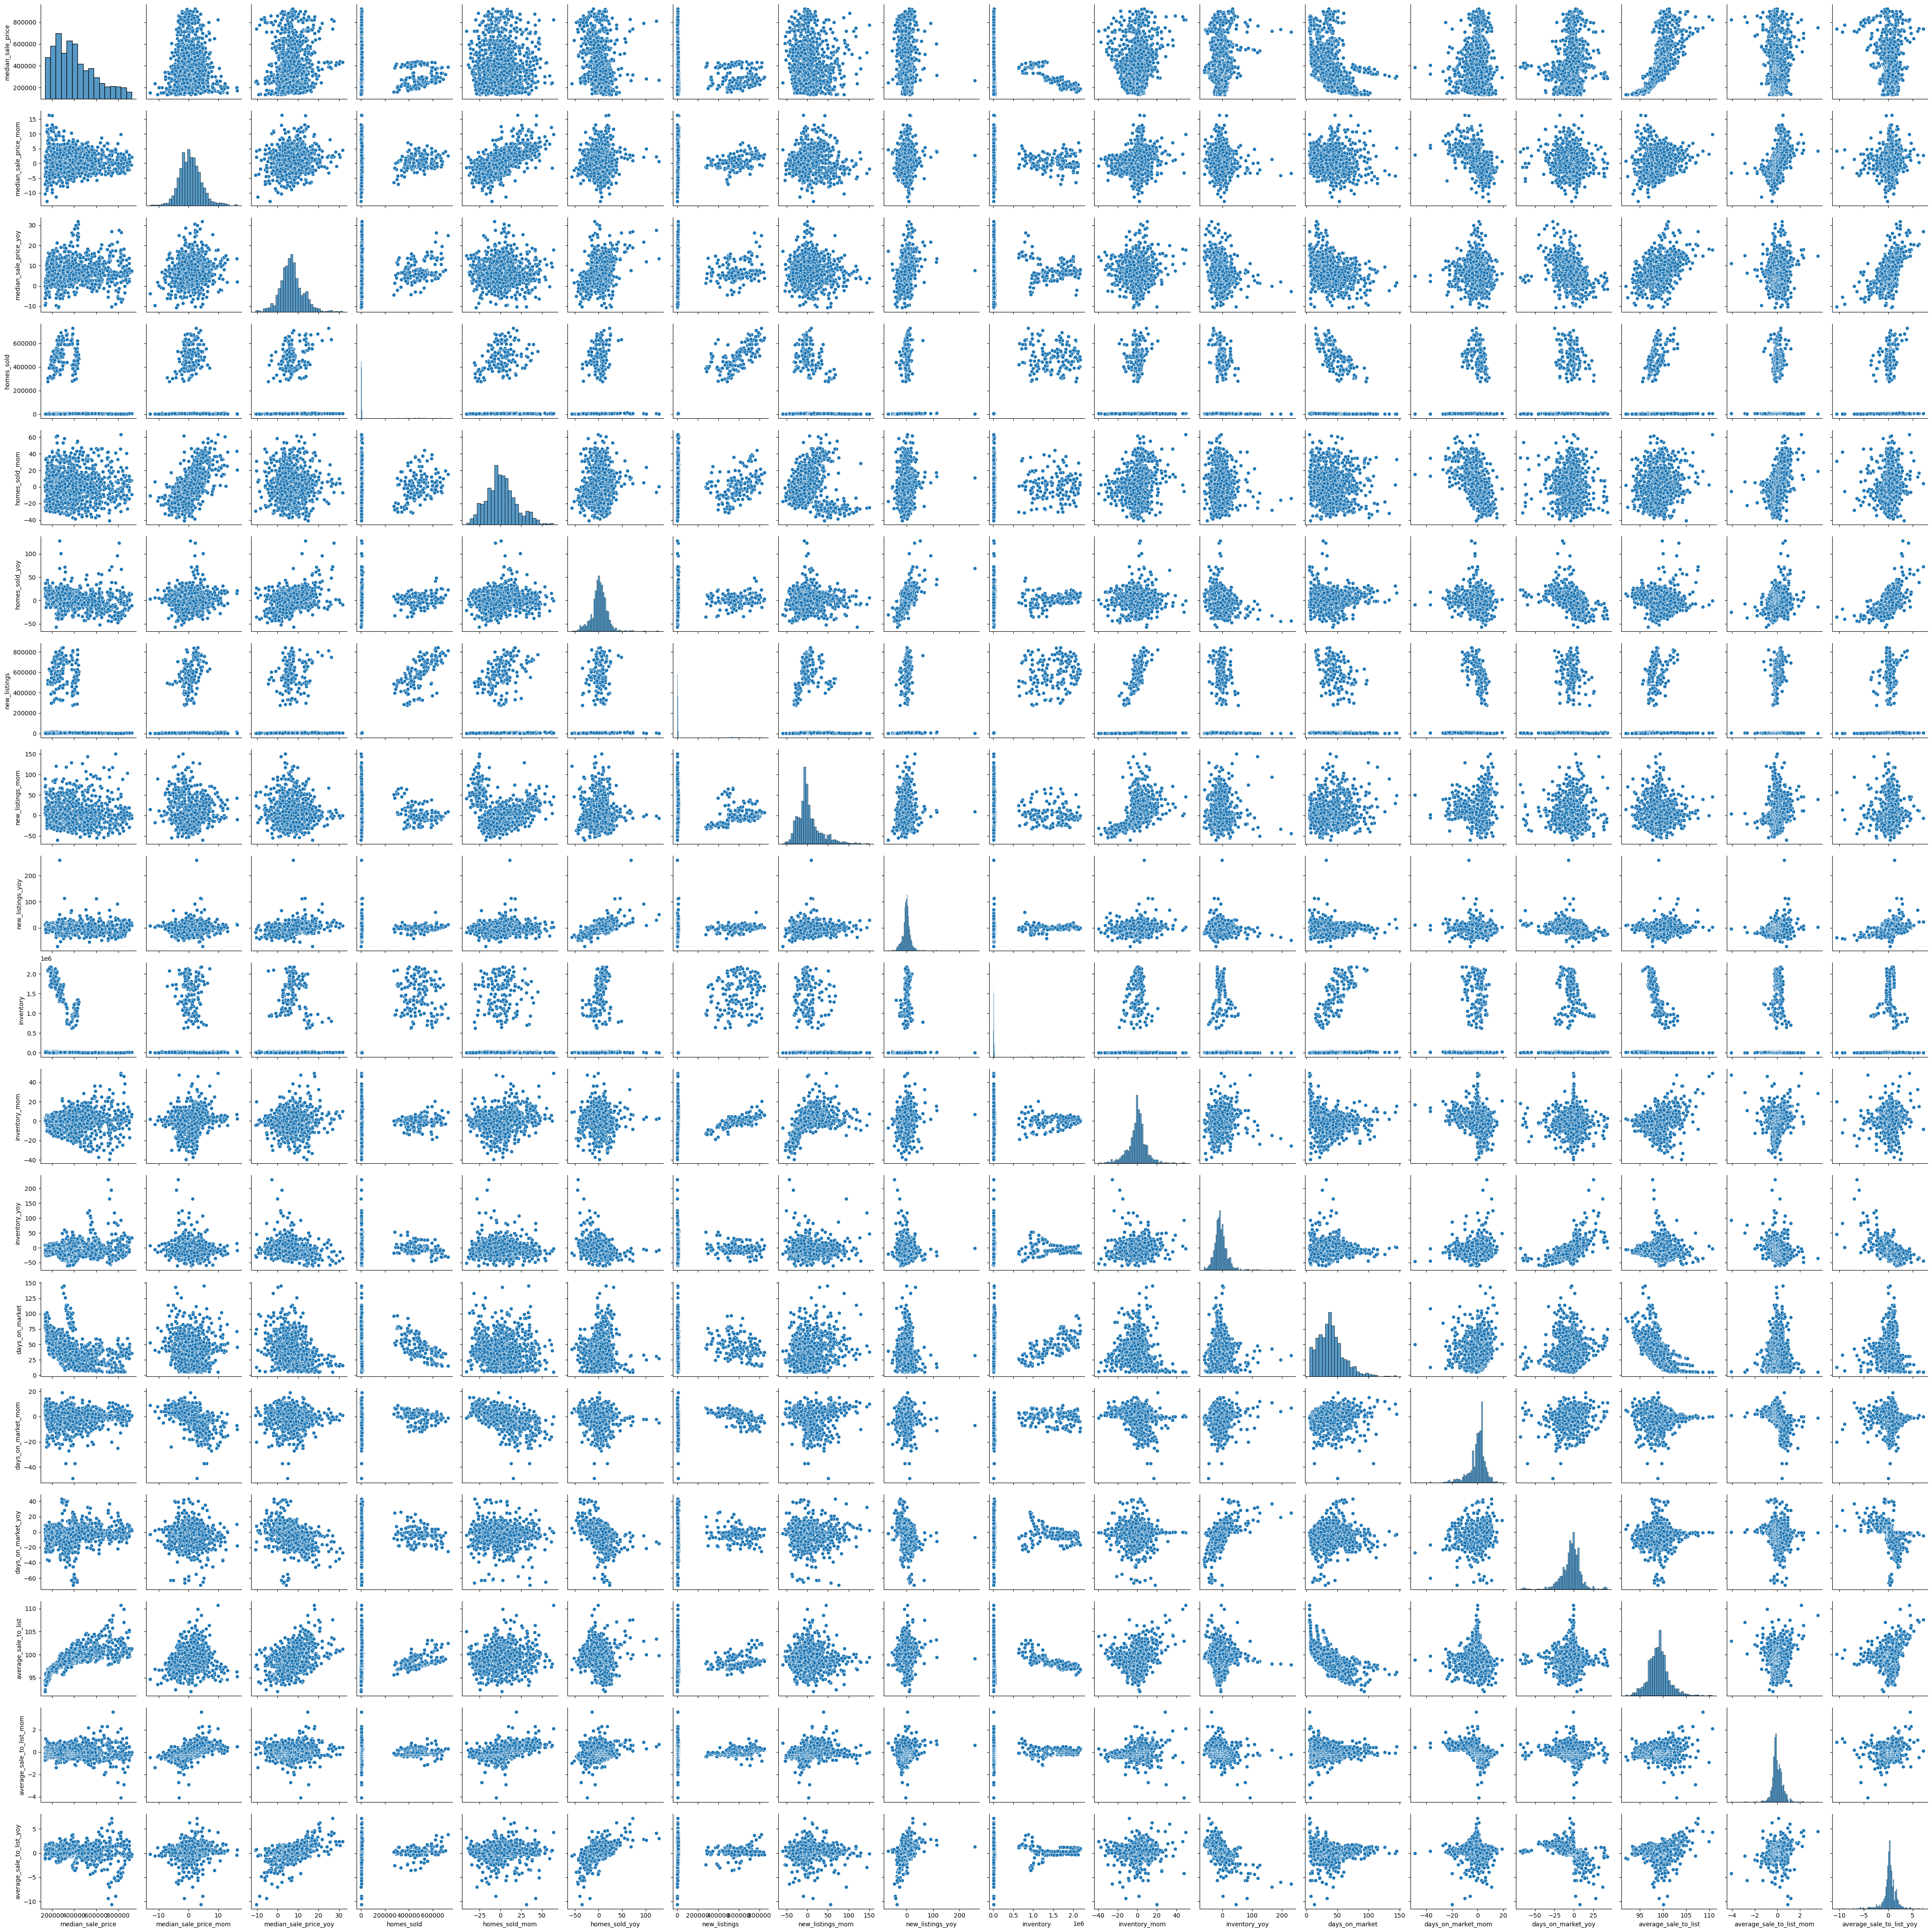

In [6]:
# visualized your data
import matplotlib.pyplot as plt
import seaborn as sns

# to view a bit closer the pairplot double click on the plot
sns.pairplot(redfin_df)

---
### What is the distribution of the Target?

- Note: this question is more of a look at the data, not a stats test question.

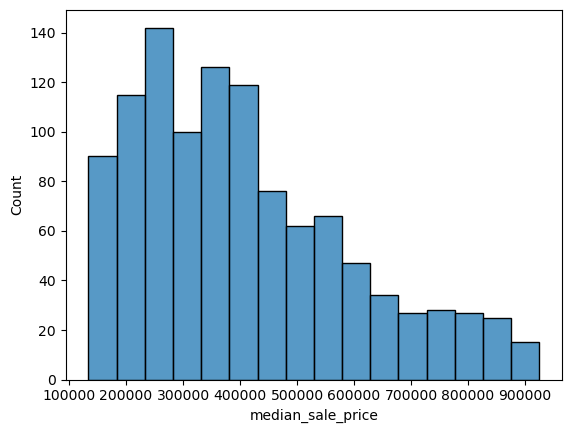

In [7]:
# get a histplot of quality
sns.histplot(redfin_df.median_sale_price)
plt.show()

#### Target Justification: **median_sale_price**

1. Core Predictive Goal
    - Both the Project Proposal (focused on housing market trend prediction) and Literature Review (highlighting house-price forecasting as critical) point to home prices as the principal outcome of interest.
    - As emphasized in Assignment 2, “Accurately predicting real estate house prices is critical for financial institutions, investors, and policymakers.”
2. Data Alignment
    - The Redfin dataset explicitly provides median_sale_price (along with month-over-month and year-over-year variations).
    - In real estate forecasting literature, the median sale price is a standard measure, serving as a robust, central indicator of market conditions.
3. Common Industry Metric
    - Forecasting median sale price is standard practice in both industry and academic settings. It allows analysis of market health and trend over time, region by region.

<div class="alert alert-block alert-info">
<b>Histogram Insights</b>
    
Looking at the histogram of median_sale_price:
- The distribution peaks roughly in the \\$200,000 - \\$300,000 range, indicating that many observations cluster around these mid-range house prices.
- The tail extends toward higher price points (up to $900,000), reflecting that while most houses fall in the lower-to-mid range, there are notable but fewer properties in higher price brackets.
- The shape suggests a right-skew (common in housing data), where a larger number of transactions occur at relatively moderate price levels, and fewer yet higher-priced properties cause the tail to stretch to the right.
</div>
---

In [ ]:
sns.boxplot(data=redfin_df['median_sale_price'])
plt.title('Boxplot of Median Sale Price')
plt.show()

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='median_sale_price', y=col, data=df)
    plt.title(f'{col} vs Median Sale Price')
    plt.show()

In [ ]:
sns.boxplot(data=redfin_df['homes_sold'])
plt.title('Boxplot of Homes Sold')
plt.show()

In [ ]:
sns.scatterplot(data=redfin_df, x='inventory', y='median_sale_price', hue='region')
plt.show()

In [ ]:
corr = redfin_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_ts = redfin_df.set_index('month_of_period_end').sort_index()
decomposition = seasonal_decompose(df_ts['median_sale_price'], model='multiplicative', period=12)
decomposition.plot()
plt.show()

In [ ]:
redfin_df.dtypes

In [ ]:
def get_categorical_cols(redfin_df):
    '''
    This function takes in a dataframe and identifies the columns that are object types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    return categorical_cols

In [ ]:
def get_numeric_cols(redfin_df):
    '''
    This function takes in a dataframe and identifies the columns that are numerical types
    and returns a list of those column names. 
    '''
    # get a list of the column names that are objects (from the mask)
    numerical_cols = df.select_dtypes(exclude=['object', 'category']).columns.tolist()
    
    return numerical_cols

In [ ]:
numerical_cols

In [8]:

# Identifying numerical and categorical columns
numerical_cols = redfin_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = redfin_df.select_dtypes(include=['object', 'bool']).columns

In [15]:
def bivariate_boxplot(df, numerical_cols, categorical_cols):
    # Bivariate exploration: Plot each variable against your target

    # For a categorical target variable, your target can be on the x-axis, and numeric variables on the y
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='median_sale_price', y=col, data=df)
        plt.title(f'{col} vs Median Sale Price')
        plt.show()

    # For a numeric target variable, your target can be on the y-axis, and independent variables on the x-axis
    for col in categorical_cols:
        if df[col].nunique() < 10:
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=col, y='median_sale_price', data=df)
            plt.title(f'Median Sale Price vs {col}')
            plt.xticks(rotation=45)
            plt.show()

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

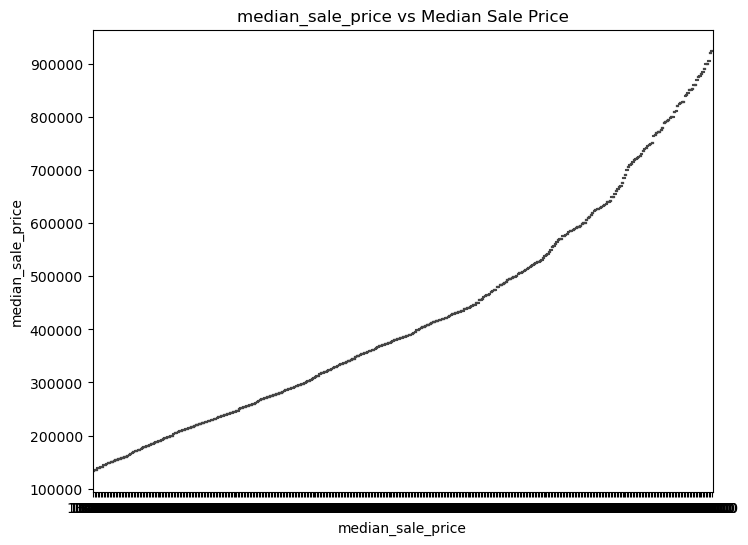

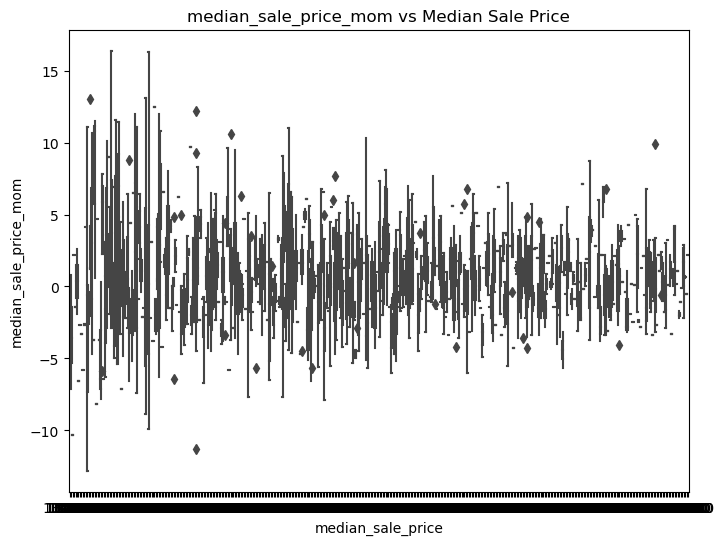

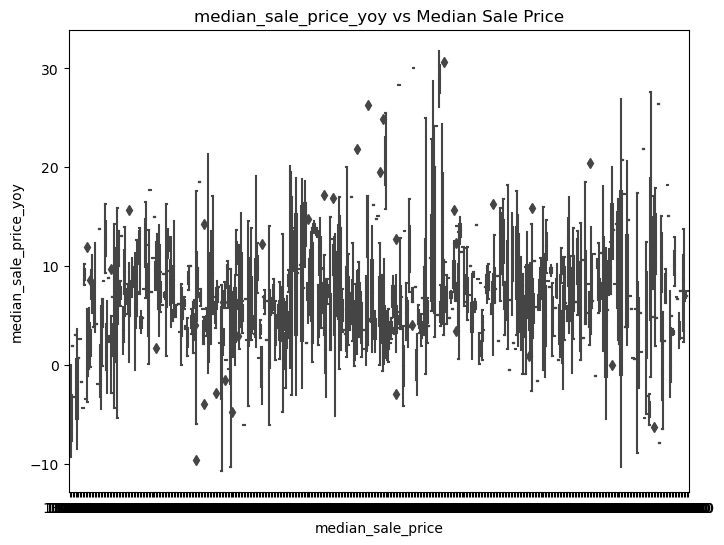

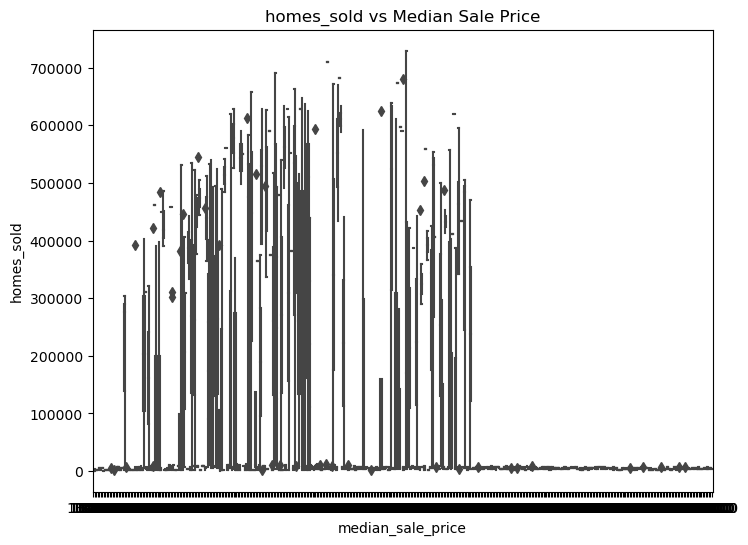

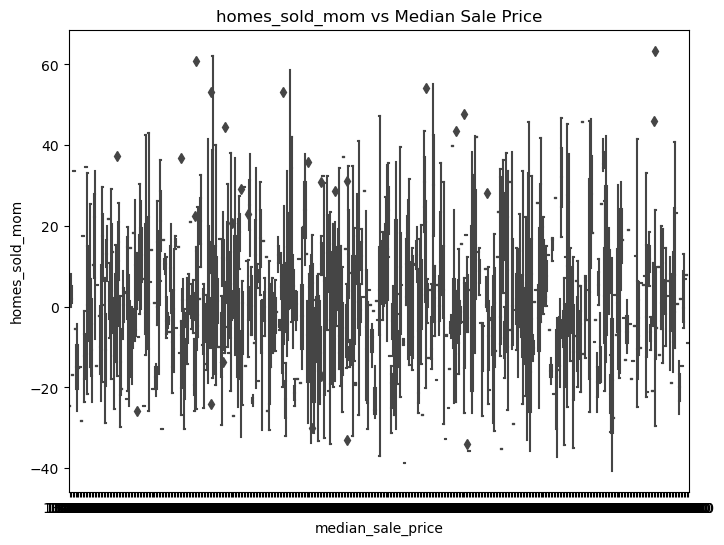

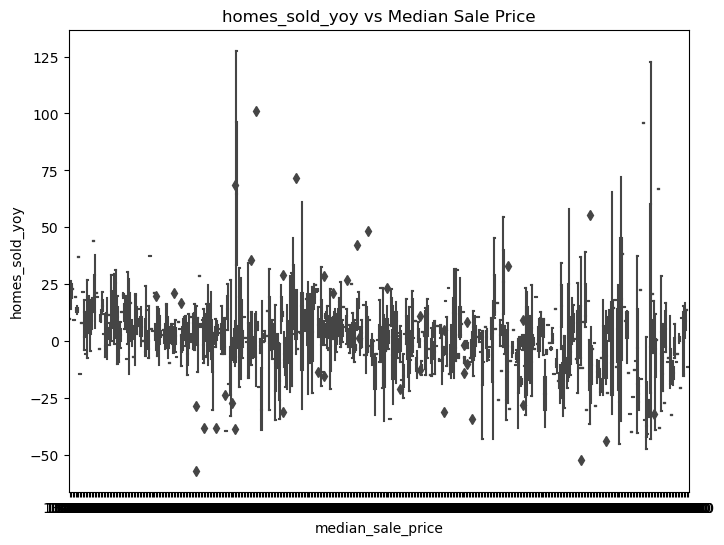

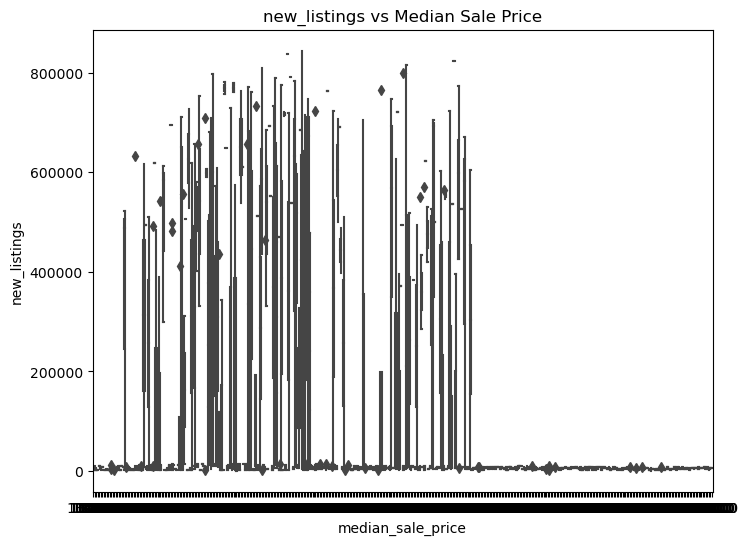

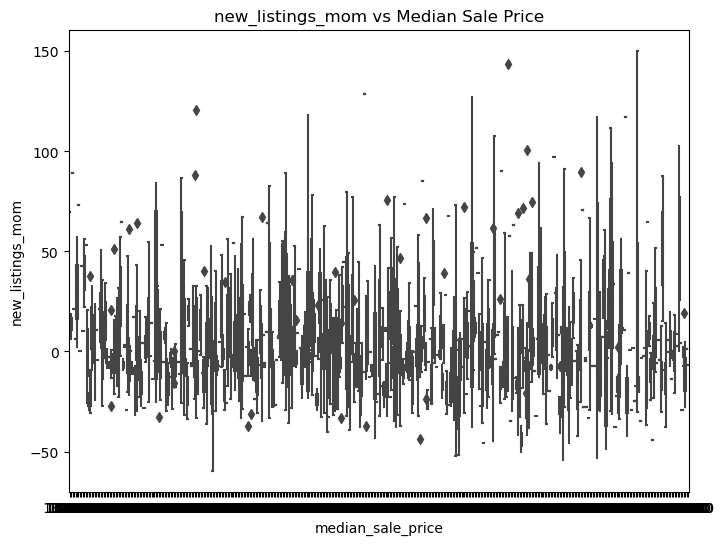

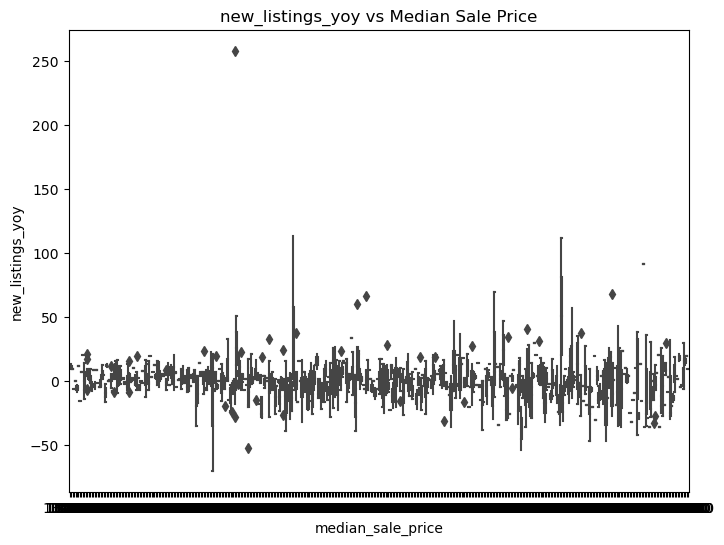

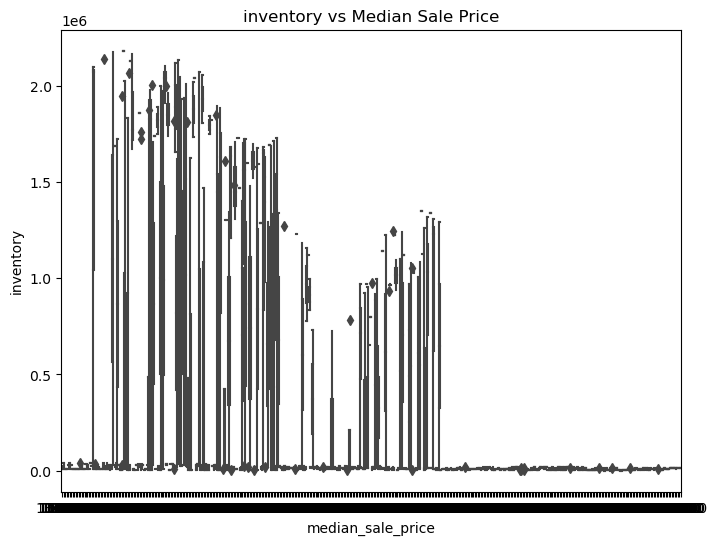

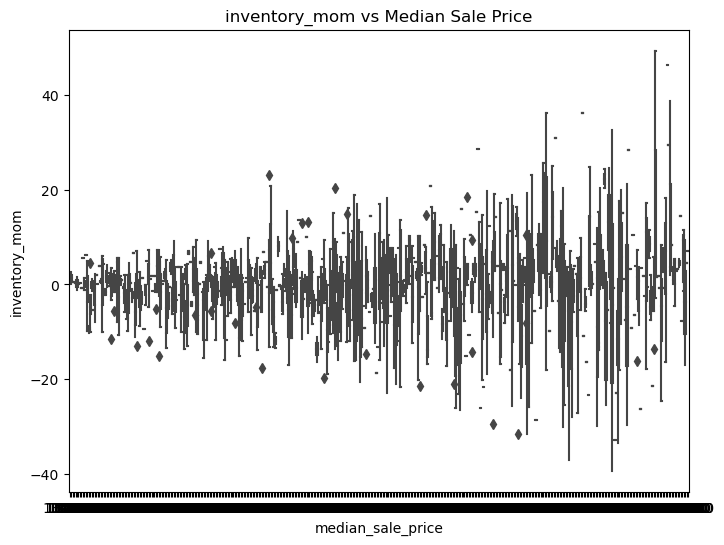

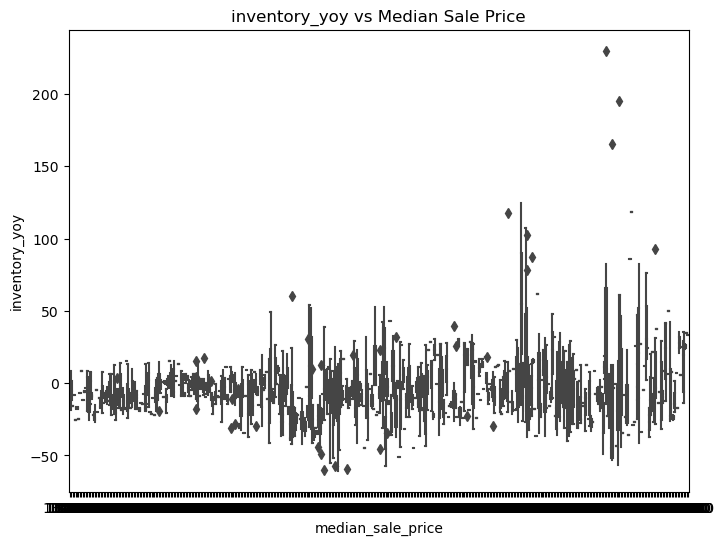

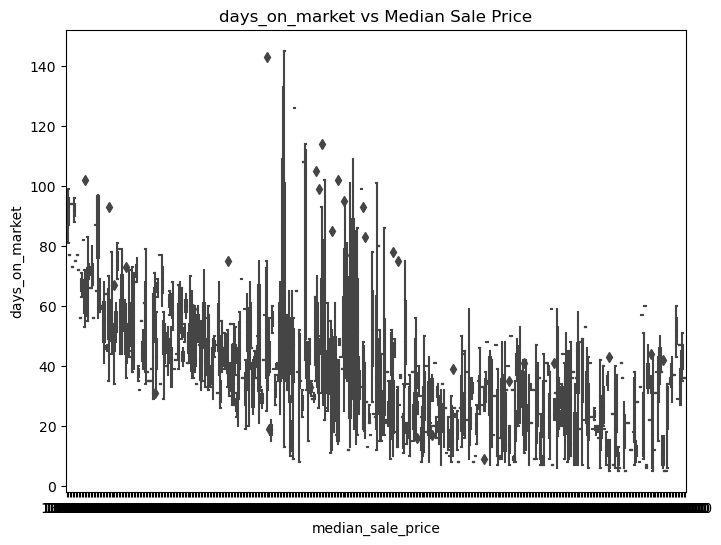

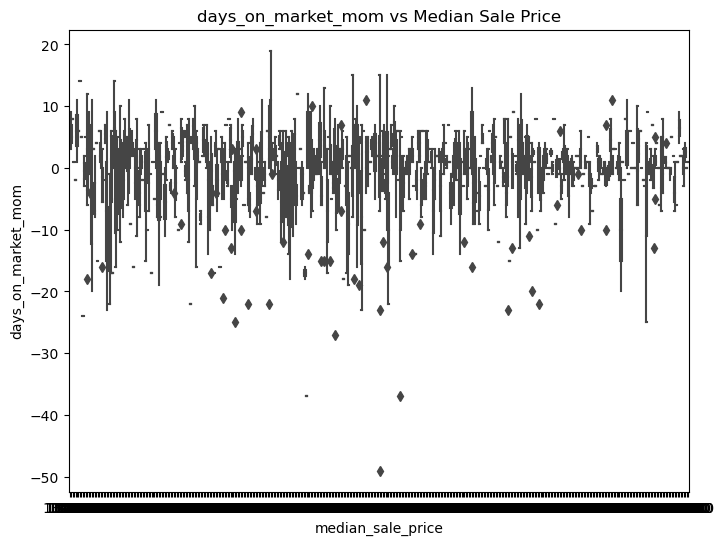

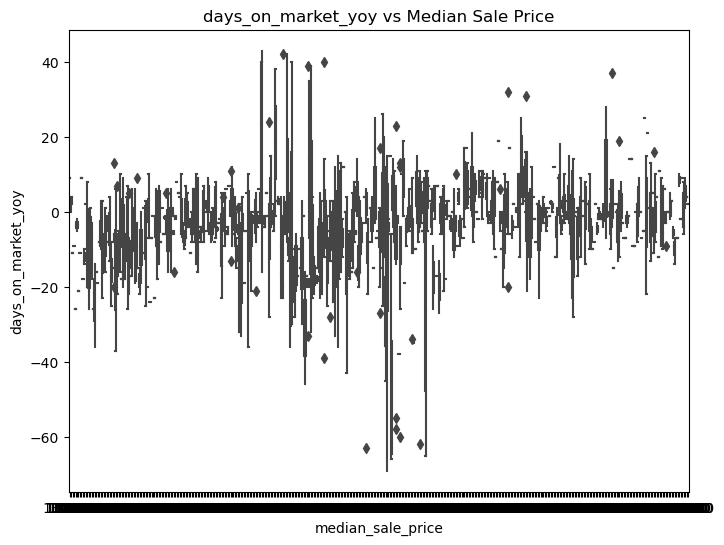

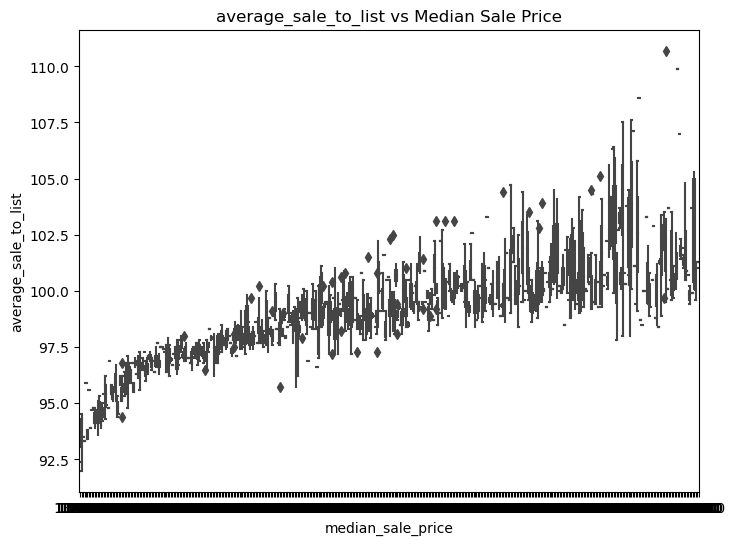

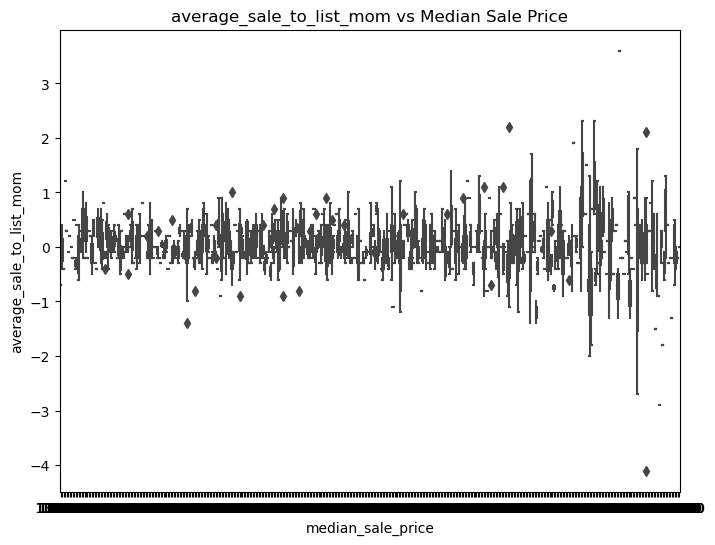

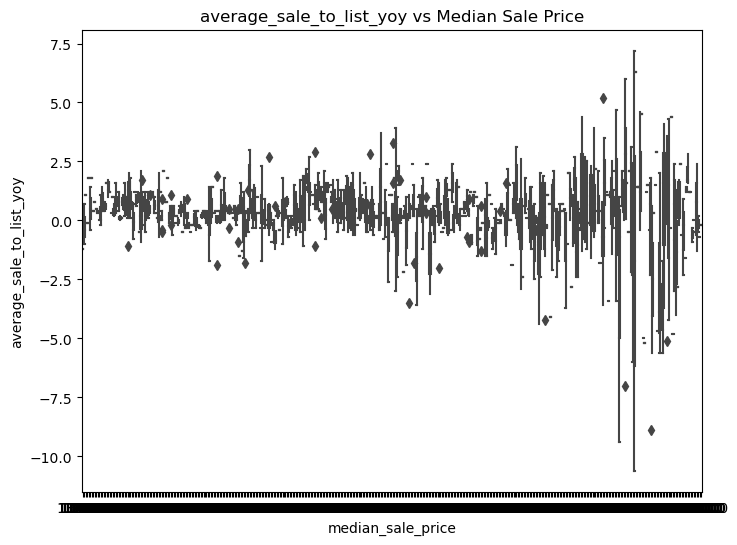

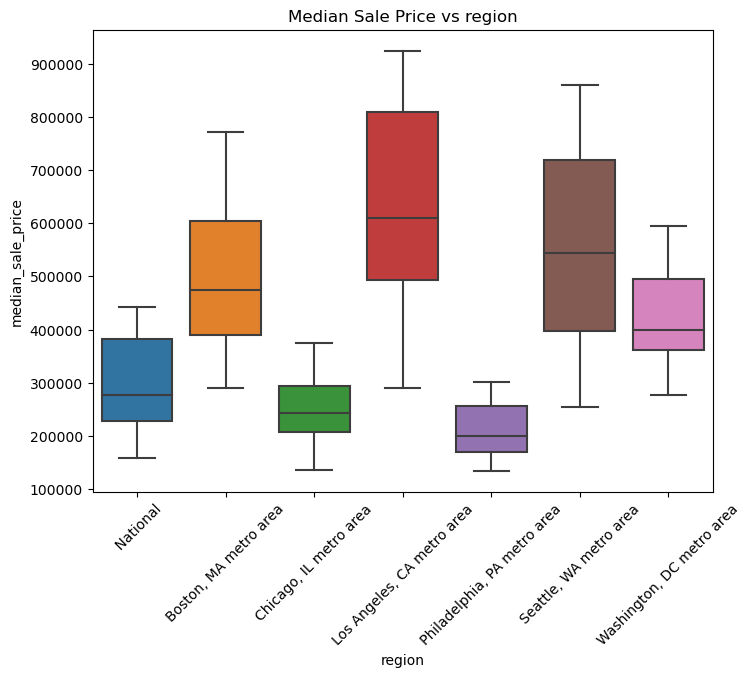

In [16]:
bivariate_boxplot(redfin_df, numerical_cols, categorical_cols)